### fMRI Dimensionality Reduction

### Notebook setup

In [11]:
# NiLearn
from nilearn.datasets import fetch_development_fmri
import nilearn.plotting as plotting
from nilearn import image

# Numpy to deal with arrays
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Built in python libraries
import random

# Set random seed for reproducibility
SEED = 11
random.seed(11)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Load the data

The `data` variable is a `Bunch` (dict. like object) with the following attributes:

- `func (list of str)`: Paths to downsampled functional MRI data (4D) for each subject.

- `confounds (list of str)`: Paths to confounds related to each subject. (tsv files)

- `phenotypic (numpy.ndarray)`: Contains each subject age, age group, child or adult, gender, handedness.

In [5]:
# Load the data using the nilearn's fetcher
data = fetch_development_fmri(n_subjects=25, data_dir='./data', resume=True, verbose=1)

# Check the path to the data
print(f"First subject functional nifti images (4D) are at: {data.func[0]}")

First subject functional nifti images (4D) are at: ./data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


### Check the phenotypic data

Let's load the phenotypic data into a pandas dataframe to check the data.

In [35]:
# Convert the phenotypic data into a pandas dataframe ensuring the correct data types
data_types = {
    'participant_id': str,
    'Age': int,
    'AgeGroup': str,
    'Child_Adult': str,
    'Gender': str,
    'Handedness': str,
}
phenotypic = pd.DataFrame(data.phenotypic, columns=data_types.keys()).astype(data_types)

# Check the phenotypic data
phenotypic.head()

,participant_id,Age,AgeGroup,Child_Adult,Gender,Handedness
0,sub-pixar123,27,Adult,adult,F,R
1,sub-pixar124,33,Adult,adult,M,R
2,sub-pixar125,31,Adult,adult,M,R
3,sub-pixar126,19,Adult,adult,F,R
4,sub-pixar127,23,Adult,adult,F,R


Let's plot the distributions of the individual variables.

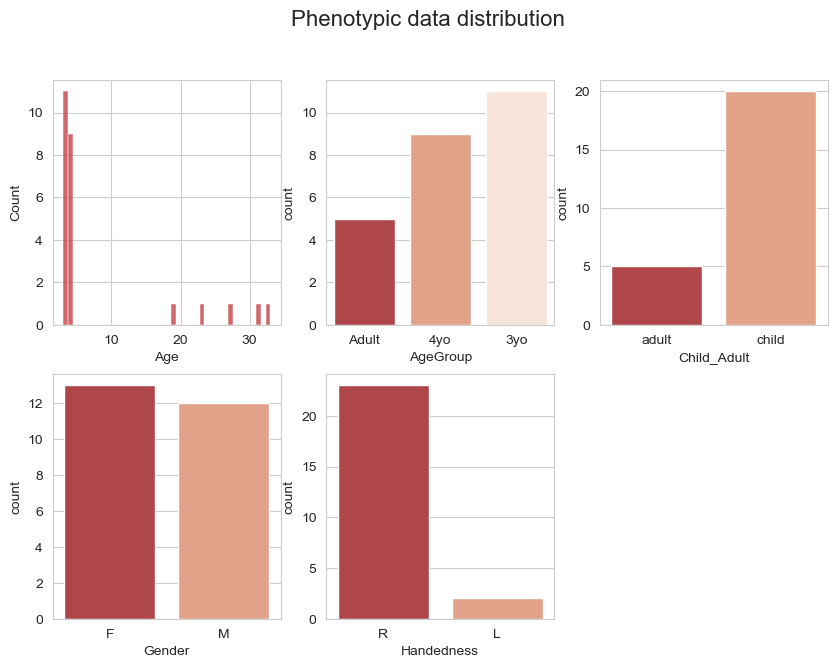

In [40]:
# The figure will have 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(10, 7))

# Plot the distribution of the age
sns.histplot(data=phenotypic, x="Age", ax=axs[0, 0], kde=False);

# Plot the categorical vars
sns.countplot(data=phenotypic, x='AgeGroup', ax=axs[0, 1])
sns.countplot(data=phenotypic, x='Child_Adult', ax=axs[0, 2])
sns.countplot(data=phenotypic, x='Gender', ax=axs[1, 0])
sns.countplot(data=phenotypic, x='Handedness', ax=axs[1, 1])

# Turn of the last axis
axs[1, 2].axis('off');

# Set the title
fig.suptitle("Phenotypic data distribution", fontsize=16);

# Save the figure
fig.savefig('figures/phenotypic_data_distribution.png', dpi=300)

### Visualize the subject

Let's dive into visualization of random subject.

In [41]:
# Generate random index from 0 to 25
i = random.randint(0, 25)

# Load the functional image
func_img = image.load_img(data.func[i])

# Plot the functional image
display = plotting.plot_img(
    func_img, title="fMRI Scan",
    display_mode='z',  # Change to 'x', 'y', 'ortho' for different views
    cut_coords=(0, 0, 0),  # Set the coordinates for the cut plane
    cmap='viridis',  # Change the colormap
    threshold=None,  # Set a threshold for overlaying statistical maps if available
    colorbar=True,  # Show colorbar
)


DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 4D image. See https://nilearn.github.io/stable/manipulating_images/input_output.html.